## MULTIPLE LINEAR REGRESSION

### Name: Snehal shyam Jagtap


### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.rename(columns = {'Age_08_04': 'Age'}, inplace = True)

In [12]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [13]:
df.rename(columns = {'cc': 'CC'}, inplace = True)

In [14]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [15]:
df.tail()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [16]:
df['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [17]:
df['CC'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [18]:
df['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

## Summary Statistics

In [20]:
df.mean()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3740\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Price        10720.915679
Age             55.980488
KM           68571.782578
HP             101.491986
Automatic        0.055749
CC            1576.560976
Doors            4.032753
Cylinders        4.000000
Gears            5.026481
Weight        1072.287108
dtype: float64

In [21]:
df.median()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3740\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Price         9900.0
Age             61.0
KM           63451.0
HP             110.0
Automatic        0.0
CC            1600.0
Doors            4.0
Cylinders        4.0
Gears            5.0
Weight        1070.0
dtype: float64

In [22]:
df.mode()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,8950,68,36000,Petrol,110,0,1600,5,4,5,1075


In [23]:
df.std()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3740\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Price         3608.732978
Age             18.563312
KM           37491.094553
HP              14.981408
Automatic        0.229517
CC             424.387533
Doors            0.952667
Cylinders        0.000000
Gears            0.188575
Weight          52.251882
dtype: float64

In [24]:
df.var()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3740\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Price        1.302295e+07
Age          3.445966e+02
KM           1.405582e+09
HP           2.244426e+02
Automatic    5.267787e-02
CC           1.801048e+05
Doors        9.075737e-01
Cylinders    0.000000e+00
Gears        3.556048e-02
Weight       2.730259e+03
dtype: float64

In [25]:
df.min()

Price        4350
Age             1
KM              1
Fuel_Type     CNG
HP             69
Automatic       0
CC           1300
Doors           2
Cylinders       4
Gears           3
Weight       1000
dtype: object

In [26]:
df.max()

Price         32500
Age              80
KM           243000
Fuel_Type    Petrol
HP              192
Automatic         1
CC            16000
Doors             5
Cylinders         4
Gears             6
Weight         1615
dtype: object

In [27]:
df.corr()

C:\Users\sneha\AppData\Local\Temp\ipykernel_3740\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
CC,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


## Visualization

<Axes: >

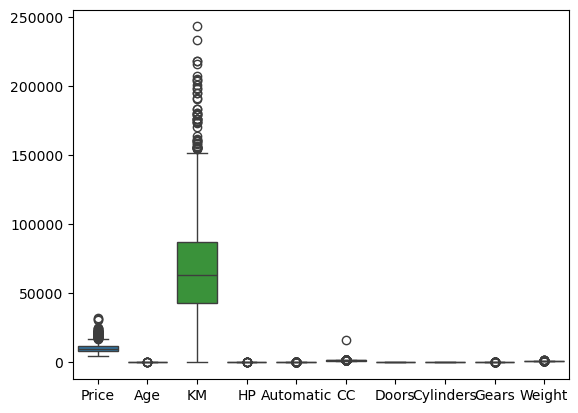

In [29]:
sns.boxplot(df)

<Axes: xlabel='Price', ylabel='Automatic'>

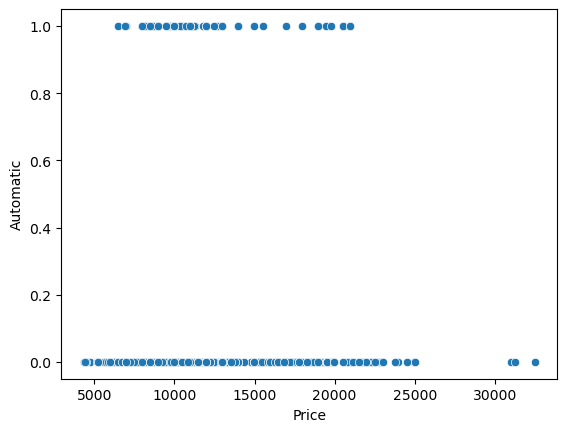

In [30]:
sns.scatterplot(x = 'Price', y ='Automatic', data = df)

<Axes: ylabel='Doors'>

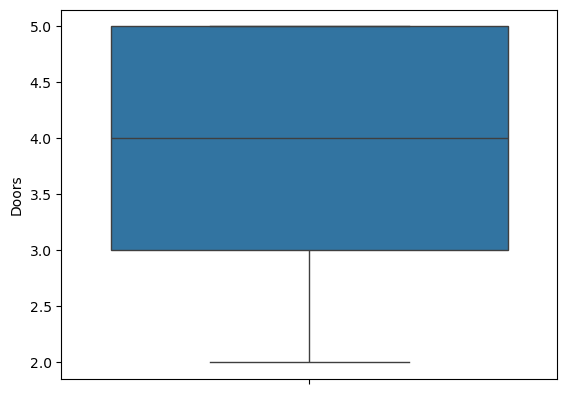

In [31]:
sns.boxplot(df['Doors'])

<Axes: ylabel='Gears'>

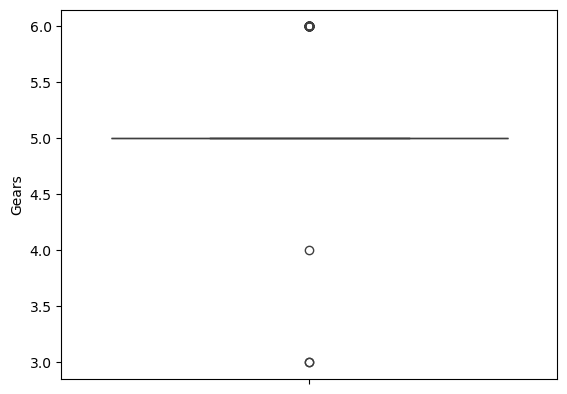

In [32]:
sns.boxplot(df['Gears'])

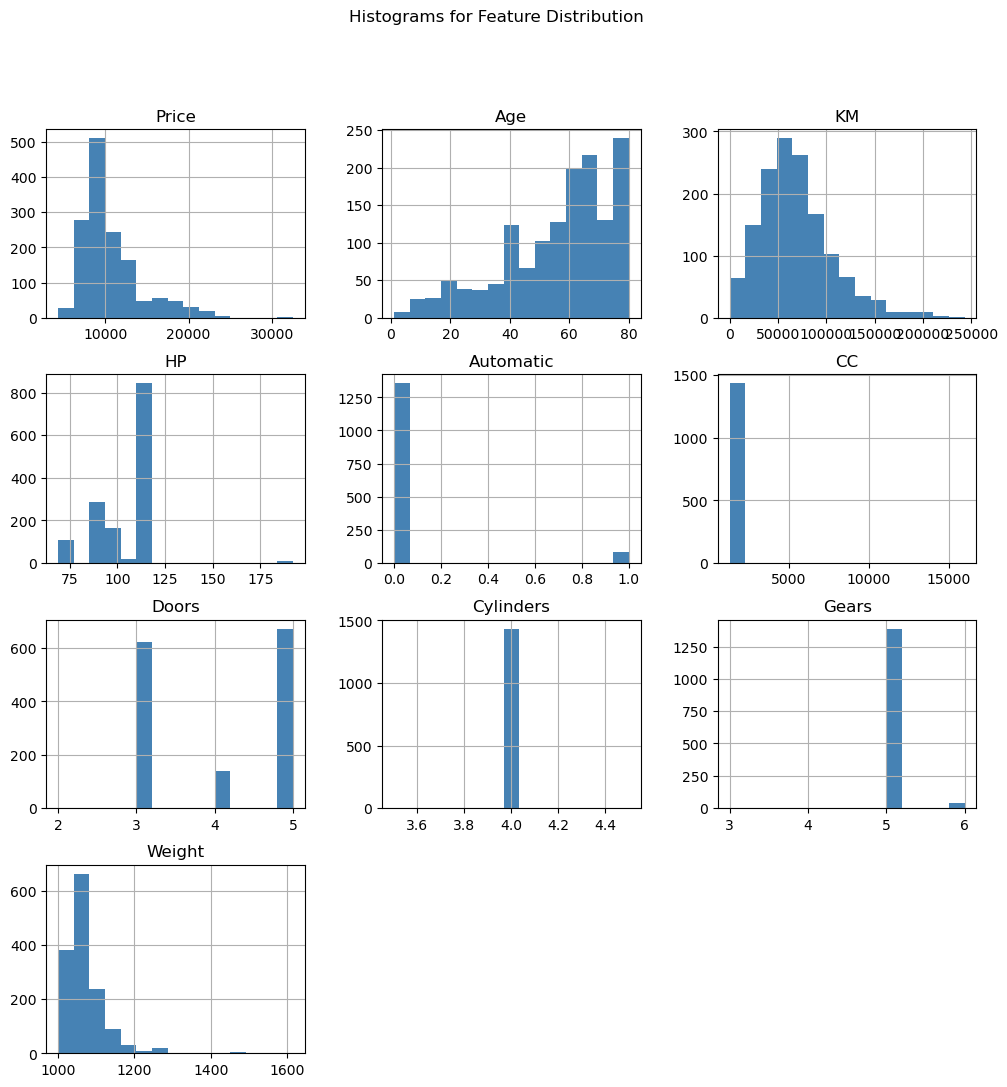

In [33]:
df.hist(bins = 15, figsize = (12, 12), color = 'steelblue')
plt.suptitle("Histograms for Feature Distribution")
plt.show()

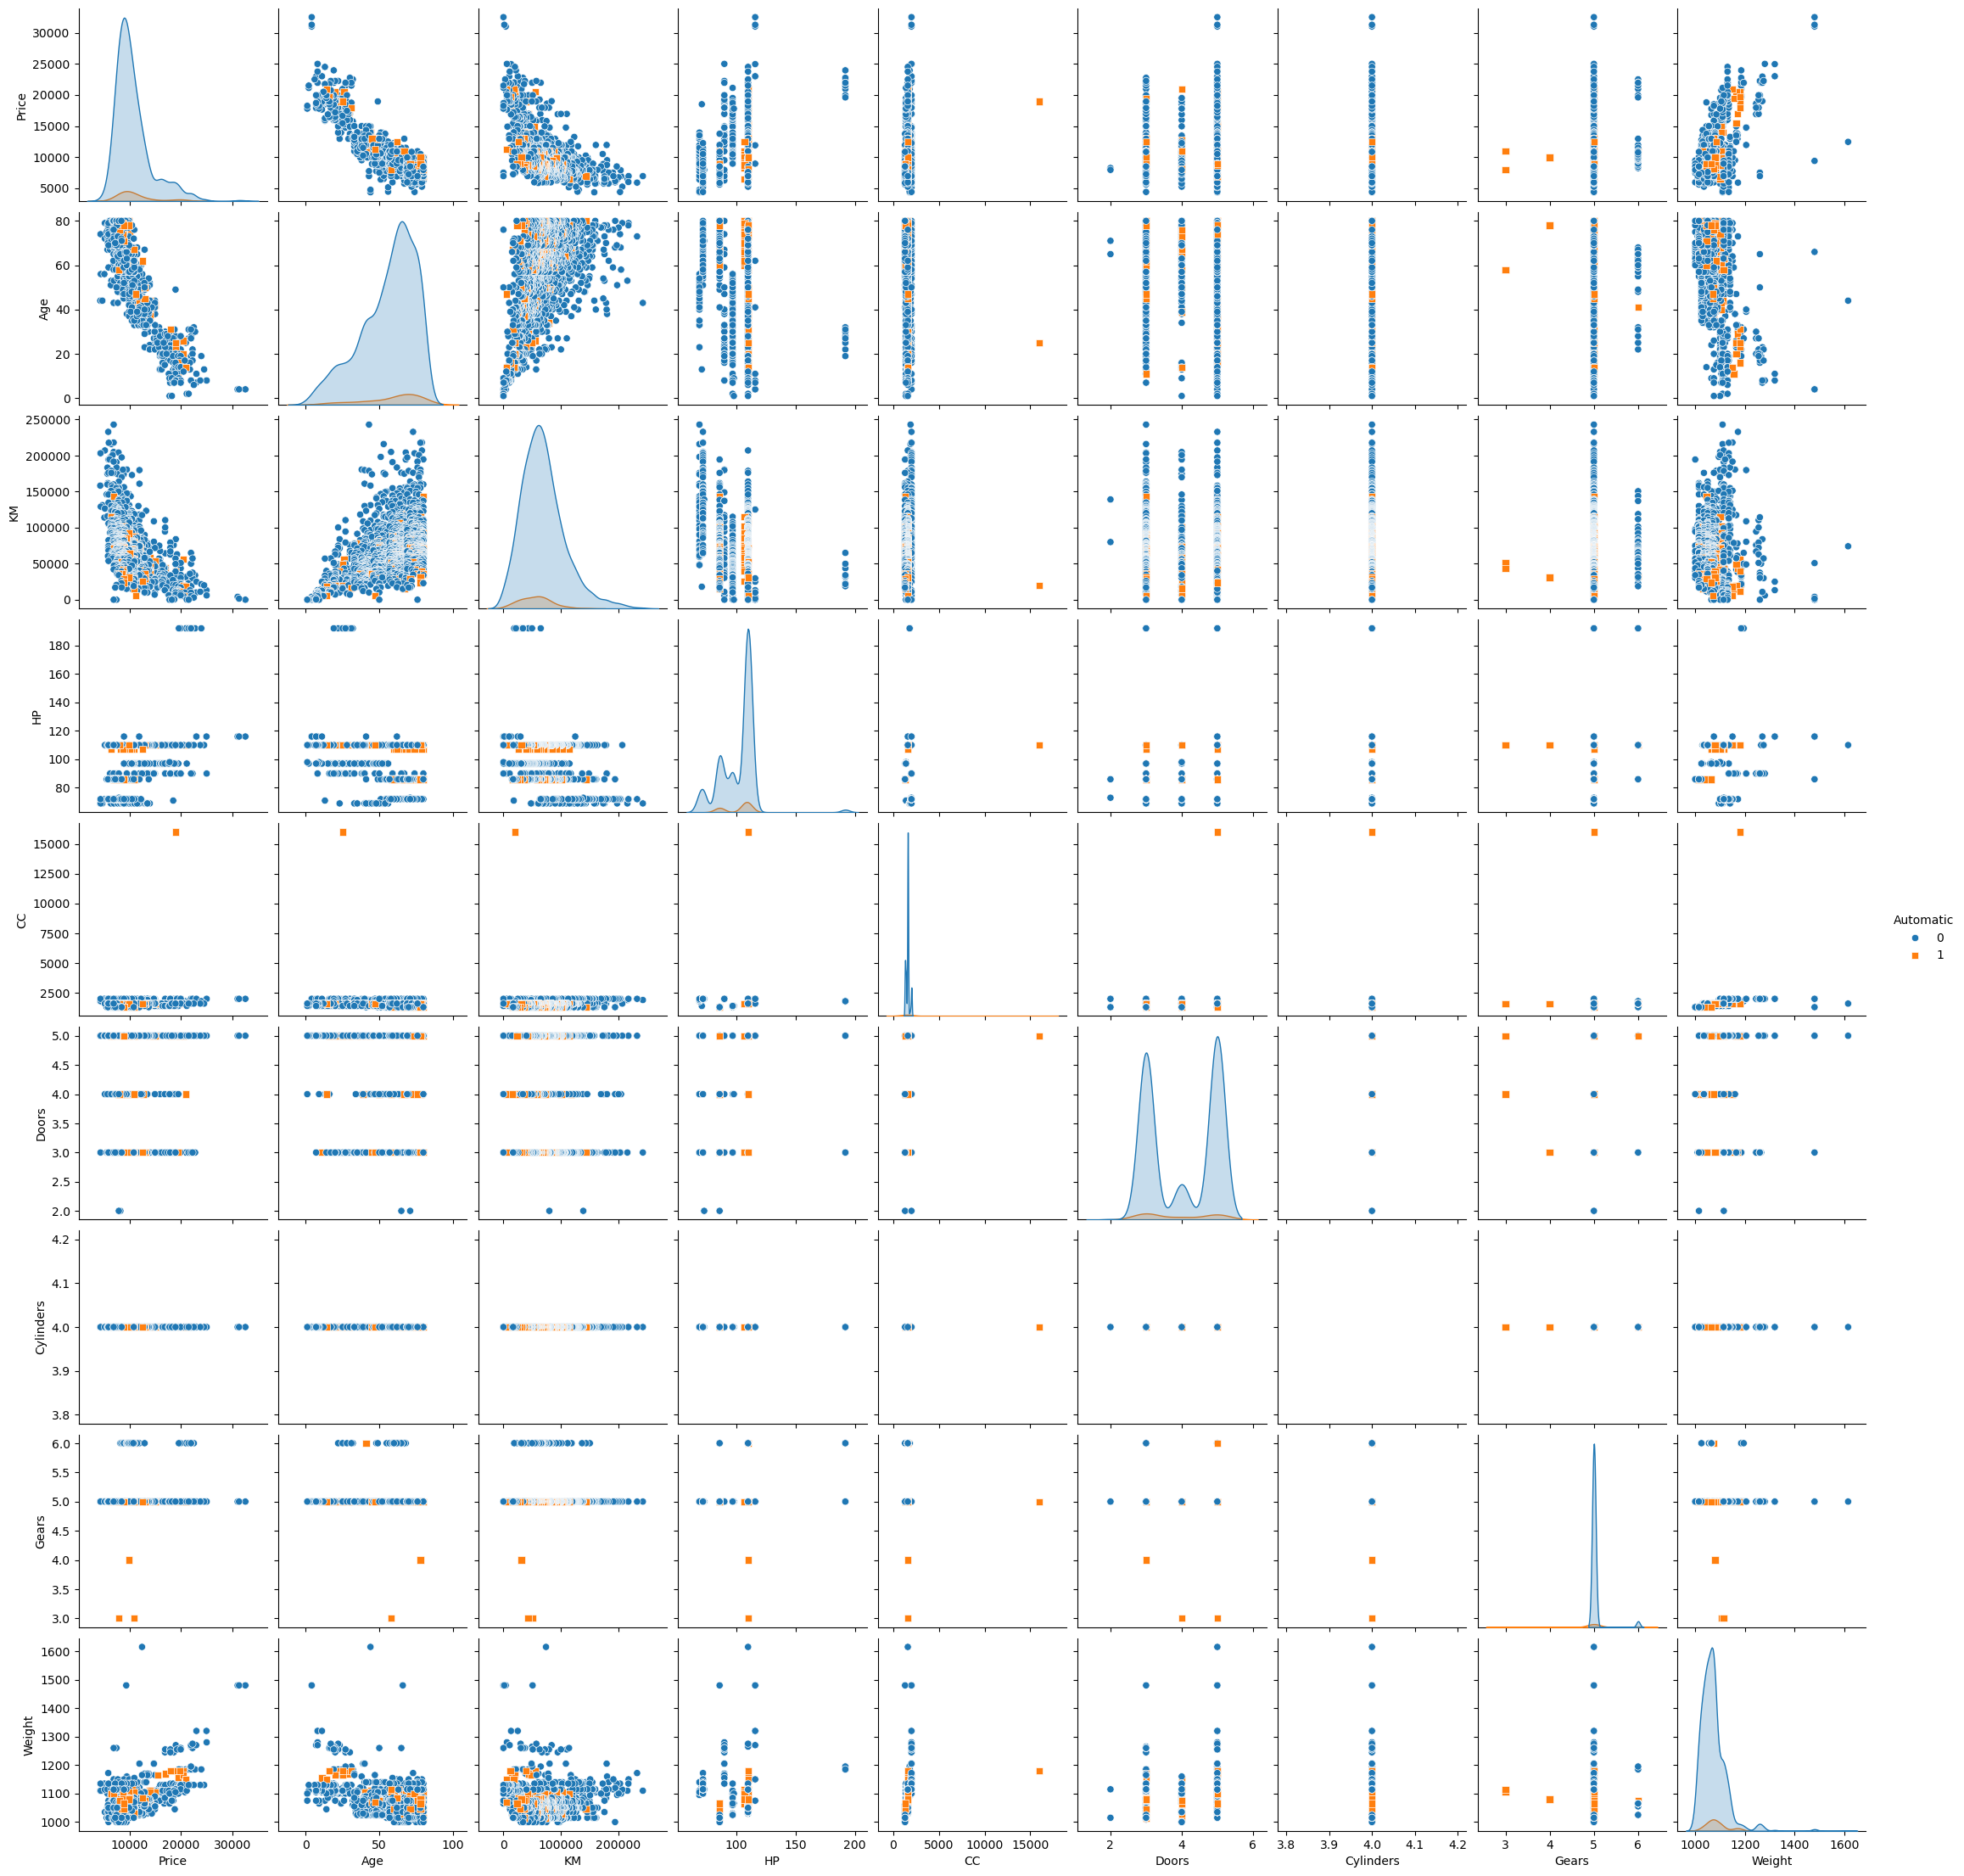

In [34]:
sns.pairplot(df, hue = 'Automatic', markers = ['o', 's'])
plt.show()

In [35]:
df.drop(columns = ['Fuel_Type'], inplace = True)

In [36]:
X = df.drop(columns = ['Automatic'])
y = df['Automatic']

In [37]:
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [40]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [41]:
model2 = LinearRegression()
model2.fit(X_train[:, :2], y_train)

LinearRegression()

In [42]:
# Linear Regression with polynomial features (degree 2)
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model3 = LinearRegression()
model3.fit(X_poly_train, y_train)

LinearRegression()

## Model Evaluation

In [44]:
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

In [45]:
y_pred2 = model2.predict(X_test[:, :2])
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

In [46]:
y_pred3 = model3.predict(X_poly_test)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

In [47]:
print("Model 1 - Basic  Linear Regression")
print(f"MSE : {mse1}, R2 : {r2_1}")

print("\nModel 2 - Linear Regression (First Two Features):")
print(f"MSE : {mse2}, R2 : {r2_2}")

print("\nModel 3 - Linear Regression with Polynomial Features:")
print(f"MSE : {mse3}, R2 : {r2_3}")

Model 1 - Basic  Linear Regression
MSE : 0.061751123638859144, R2 : 0.047494699811013286

Model 2 - Linear Regression (First Two Features):
MSE : 0.06486879007687511, R2 : -0.0005950130790497443

Model 3 - Linear Regression with Polynomial Features:
MSE : 0.12204527707688047, R2 : -0.8825369714504807


In [48]:
print("\nModel 1 Coefficients :", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)


Model 1 Coefficients : [ 4.95582708e-02  6.85148331e-02 -2.78816116e-02 -8.75297395e-03
  1.68466131e-02 -1.15002520e-02  1.73472348e-17 -2.16967037e-02
  1.68375787e-02]
Model 1 Intercept: 0.052965881396964815


## Lasso Regression

In [50]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("\nLasso Regression:")
print(f"MSE : {mse_lasso}, R2 : {r2_lasso}")
print("Lasso Coefficients:", lasso.coef_)


Lasso Regression:
MSE : 0.06513372749456713, R2 : -0.00468164794007464
Lasso Coefficients: [ 0.  0. -0.  0.  0. -0.  0. -0.  0.]


In [51]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("\nRidge Regression:")
print(f"MSE : {mse_ridge}, R2 : {r2_ridge}")
print("Ridge Coefficients:", ridge.coef_)


Ridge Regression:
MSE : 0.06174800724141788, R2 : 0.04754276994974738
Ridge Coefficients: [ 0.0490363   0.06804188 -0.02788344 -0.00866317  0.01682985 -0.01148287
  0.         -0.02166472  0.01689997]
